Классическая вероятность: 0.046875

Таблица частотных вероятностей:



,Число опытов N,Частотная вероятность
0,100,0.010000
1,162,0.043210
2,263,0.026616
3,428,0.030374
4,695,0.057554
5,1128,0.061170
6,1832,0.041485
7,2976,0.050067
8,4832,0.048634
9,7847,0.047916


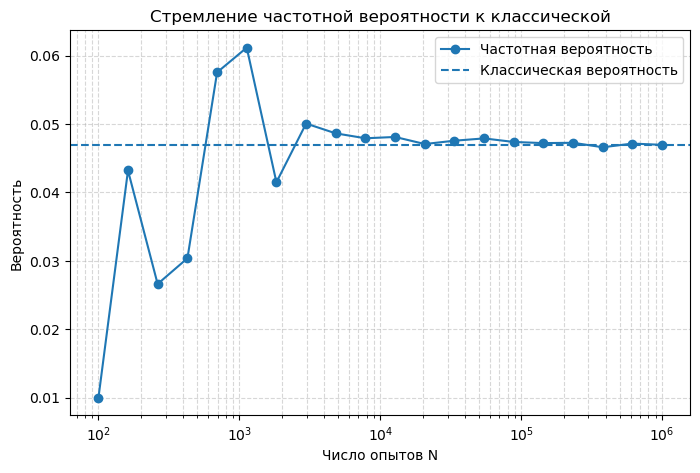

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

outcomes = [(i, j) for i in range(1, 9) for j in range(1, 9)]

favorable = [
    (i, j) for i, j in outcomes
    if (i + j > 10) and (i % 2 == 1) and (j % 2 == 1)
]

classical_prob = len(favorable) / len(outcomes)

print("Классическая вероятность:", classical_prob)
print()

Ns = np.logspace(2, 6, 20, dtype=int)
freq_probs = []

for N in Ns:
    rolls1 = np.random.randint(1, 9, N)
    rolls2 = np.random.randint(1, 9, N)
    cond = (rolls1 + rolls2 > 10) & (rolls1 % 2 == 1) & (rolls2 % 2 == 1)
    freq_probs.append(np.mean(cond))

table = pd.DataFrame({
    "Число опытов N": Ns,
    "Частотная вероятность": freq_probs
})

print("Таблица частотных вероятностей:\n")
display(table)

plt.figure(figsize=(8, 5))
plt.plot(Ns, freq_probs, marker='o', label="Частотная вероятность")
plt.axhline(classical_prob, linestyle='--', label="Классическая вероятность")
plt.xscale("log")
plt.xlabel("Число опытов N")
plt.ylabel("Вероятность")
plt.title("Стремление частотной вероятности к классической")
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.show()
